## This notebook implements a simple Multi-Layer Perceptron (MLP) for the XOR problem using **only NumPy**. 

The goal is to manually code:
1.  The **Forward Pass** (making a prediction).
2.  The **Backward Pass** (Backpropagation) to calculate gradients.
3.  The **Gradient Descent** update step to train the network.

### 1. Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

### 2. Activation Function and its Derivative

Backpropagation requires the *derivative* of the activation function. We'll use **Sigmoid** because its math is simple and clear for a demo, even though ReLU is more modern.

* **Sigmoid:** $\sigma(x) = \frac{1}{1 + e^{-x}}$
* **Derivative of Sigmoid:** $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)

### 3. Network Architecture and Initialization

Building a simple network:
* **Input Layer:** 2 neurons (for $x_1$ and $x_2$)
* **Hidden Layer:** 4 neurons
* **Output Layer:** 1 neuron (to output a 0 or 1)

In [3]:
np.random.seed(42)

input_neurons = 2
hidden_neurons = 4
output_neurons = 1

W_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
b_hidden = np.random.uniform(size=(1, hidden_neurons))

W_output = np.random.uniform(size=(hidden_neurons, output_neurons))
b_output = np.random.uniform(size=(1, output_neurons))

print("Initial Hidden Weights:\n", W_hidden)
print("\nInitial Output Weights:\n", W_output)

Initial Hidden Weights:
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]]

Initial Output Weights:
 [[0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]]


### 4. The Training Loop

Here is the entire process. We will:
1.  Define a `learning_rate` and number of `epochs` (training cycles).
2.  Loop for `epochs`:
    1.  **Forward Pass**
    2.  **Calculate Loss** (We'll use Mean Squared Error for simplicity)
    3.  **Backward Pass (Backpropagation)**
    4.  **Update Weights** (Gradient Descent)

In [4]:
epochs = 10000
learning_rate = 0.1

loss_history = []

for epoch in range(epochs):
    #Forward Pass
    z_hidden = np.dot(X, W_hidden) + b_hidden
    a_hidden = sigmoid(z_hidden)

    z_output = np.dot(a_hidden, W_output) + b_output
    prediction = sigmoid(z_output)

    #Calculating Loss
    error = y - prediction
    loss = np.mean(error**2)
    loss_history.append(loss)

    #Back-Propagation
    delta_output = error * sigmoid_derivative(prediction)
    
    # Propagate the error back to the Hidden Layer
    # error_hidden is how much the hidden layer contributed to the output error
    error_hidden = np.dot(delta_output, W_output.T)
    
    # Calculate the delta for the hidden layer
    # delta = (error_hidden) * (derivative of activation)
    delta_hidden = error_hidden * sigmoid_derivative(a_hidden)
    grad_output_weights = np.dot(a_hidden.T, delta_output)
    W_output += grad_output_weights * learning_rate
    b_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    
    # Update Hidden Layer weights
    grad_hidden_weights = np.dot(X.T, delta_hidden)
    W_hidden += grad_hidden_weights * learning_rate
    b_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")
    

Epoch 0, Loss: 0.332183
Epoch 1000, Loss: 0.249044
Epoch 2000, Loss: 0.244445
Epoch 3000, Loss: 0.218039
Epoch 4000, Loss: 0.156119
Epoch 5000, Loss: 0.055950
Epoch 6000, Loss: 0.020902
Epoch 7000, Loss: 0.010895
Epoch 8000, Loss: 0.006879
Epoch 9000, Loss: 0.004864


### 5. Checking Results and Plotting Loss


Final Predictions (after training):
[[0.04690448]
 [0.95664034]
 [0.92549543]
 [0.07176648]]

Expected Output (y):
[[0]
 [1]
 [1]
 [0]]


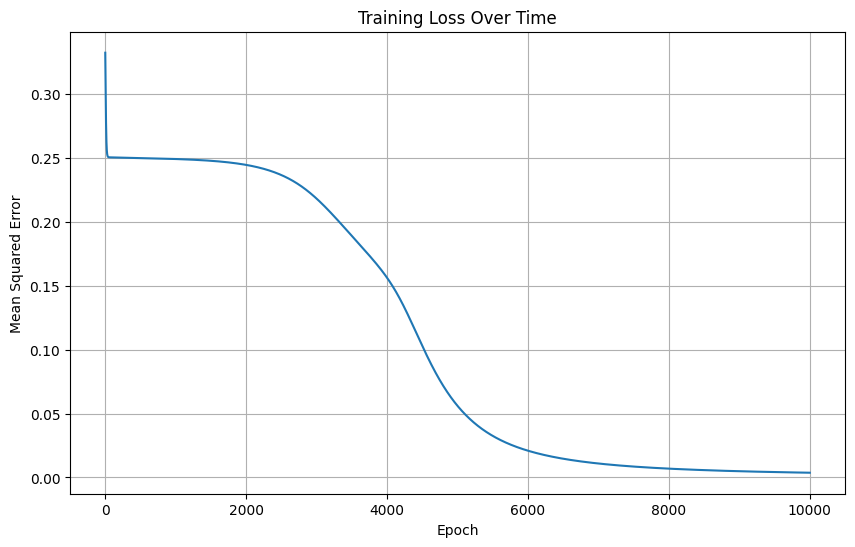

In [5]:
# Print final predictions
print("\nFinal Predictions (after training):")
# We re-run the forward pass with the *trained* weights
z_hidden = np.dot(X, W_hidden) + b_hidden
a_hidden = sigmoid(z_hidden)
z_output = np.dot(a_hidden, W_output) + b_output
final_prediction = sigmoid(z_output)

print(final_prediction)

print("\nExpected Output (y):")
print(y)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### 6. Conclusion

In the output, you should see the `final_prediction` values are very close to the `y` values (e.g., `0.05` instead of `0`, and `0.95` instead of `1`).

The "Training Loss" plot is the most important part. It shows a steep drop and then a flat-line (convergence), which is **visual proof that backpropagation and gradient descent worked.** The network successfully learned the non-linear XOR pattern by adjusting its weights to minimize the loss.